# Safety Issue

## Description
* We first selected the "Police Arrest Data" as our initial metric to assess the safety of neighborhoods in Pittsburgh. To identify the 20 safest neighborhoods in terms of arrest rates, we utilized the value_counts() function to count the number of arrests for each unique neighborhood in the dataset. Subsequently, we applied the sort_values() function to obtain the top 20 neighborhoods with the lowest number of arrests. This approach allowed us to rank the neighborhoods based on their relative safety levels.

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

arrest_data = pd.read_csv ("Police Arrest Data.csv")
arrest_data.head()
safety_ranking = arrest_data ['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending = True)
top20_safety = safety_ranking.iloc[:20]
print (top20_safety)


Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Regent Square                   35
Ridgemont                       35
New Homestead                   39
Chartiers City                  40
Swisshelm Park                  40
East Carnegie                   48
St. Clair                       48
Outside County                  52
Outside State                   60
Summer Hill                     66
Oakwood                         79
Golden Triangle/Civic Arena     83
Hays                           106
Fairywood                      112
Mount Oliver                   113
Windgap                        115
Name: INCIDENTNEIGHBORHOOD, dtype: int64


## Graph
* The graph below visually shows how many times the top 20 safest neighborhoods appear in the database.

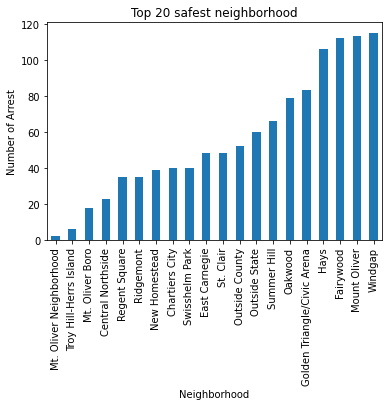

In [12]:
top20_safety.plot(kind = 'bar', title = 'Top 20 safest neighborhood')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Arrest")
plt.show()

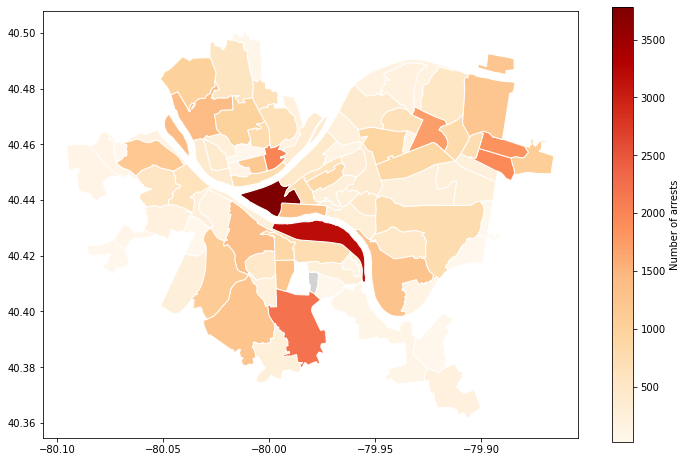

In [43]:
import geopandas

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# do the merge
arrest_map = neighborhoods.merge(safety_ranking, how='left', left_on='hood', right_index=True)
# look at the head to confirm it merged correctly
arrest_map[['hood','INCIDENTNEIGHBORHOOD','geometry']].head()

arrest_map.plot(column='INCIDENTNEIGHBORHOOD', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of arrests"}, # label the legend
               figsize=(12, 8),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )